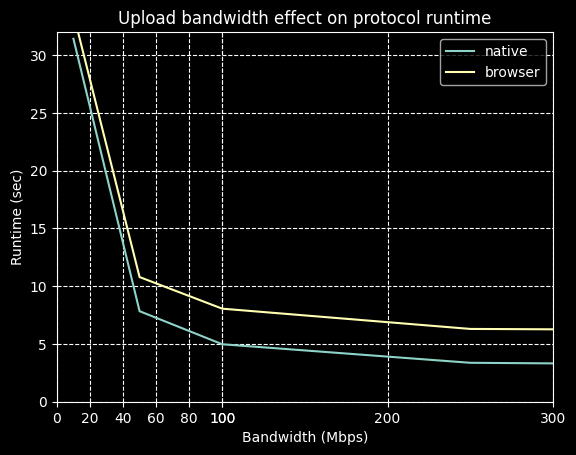

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import pandas as pd

for dark in [True, False]:
    if dark:
        plt.style.use("dark_background")
    else:
        plt.style.use("default")

    df1 = pd.read_csv("bandwidth.native.csv", header=0)
    df2 = pd.read_csv("bandwidth.browser.csv", header=0)


    agg1 = df1.groupby("bandwidth")["time_total"].mean().reset_index()
    agg2 = df2.groupby("bandwidth")["time_total"].mean().reset_index()


    plt.plot(agg1["bandwidth"], agg1["time_total"]/1000.0, label="native")
    plt.plot(agg2["bandwidth"], agg2["time_total"]/1000.0, label="browser")

    plt.xticks(list(range(0, 120, 20)) + list(range(100, 400, 100)) )


    plt.xlim(0, 300)
    plt.ylim(0, 32)
    plt.xlabel("Bandwidth (Mbps)")
    plt.ylabel("Runtime (sec)")
    plt.title("Upload bandwidth effect on protocol runtime")
    plt.legend(loc="upper right") 

    plt.grid(True, linestyle="--")

    svg_name = "bandwidth_dark.svg" if dark else "bandwidth_light.svg"
    plt.savefig(svg_name, bbox_inches="tight")
    plt.show()